In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import docs.source.filters as filters
import sympy
sympy.init_printing()

4/4 BPF Response

In [8]:
z = sympy.symbols('z')

k, alpha, j, Ch, Cr = sympy.symbols('k, alpha, j, Ch, Cr')
H_44_z = k / (1 - (alpha + j*(1-alpha))*z**-1)
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

print('H_44_z, k, alpha = ')
H_44_z, k, alpha

H_44_z, k, alpha = 


In [9]:
# #Variables
Ch = 22.9e-12
Cr = 75e-15
fs = 9.6e9

H_44, omega, Zo, fc = filters.DFTF('BPF44', Ch, Cr, fs)

# Convert normalized frequencies (omega) to Hz
frequencies_1 = omega * fs / (2 * np.pi)

4/4 BPF Ch = 2.29e-11 Cr = 7.5e-14 Fs = 9600000000.0
Zo =  1388.888888888889
Fc =  5.003980319335841  MHz
arctan(Cr / Ch) =  0.0032750974604027886
fs / (2 * np.pi) =  1527887453.6821952


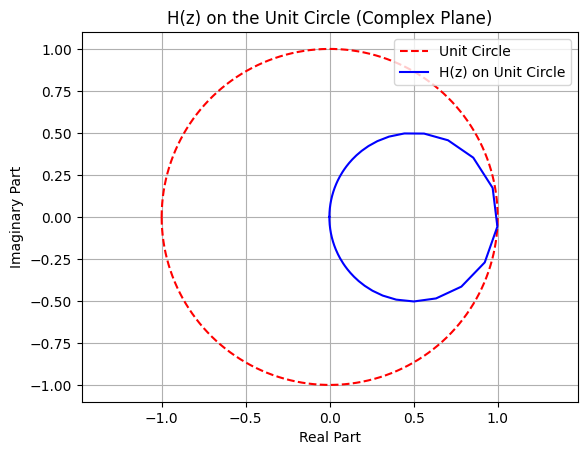

In [10]:
# Unit circle in the complex plane
unit_circle = np.exp(1j * omega)

# Plot the unit circle
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
# Plot H(z) on the complex plane
plt.plot(np.real(H_44), np.imag(H_44), 'b', label='H(z) on Unit Circle')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()

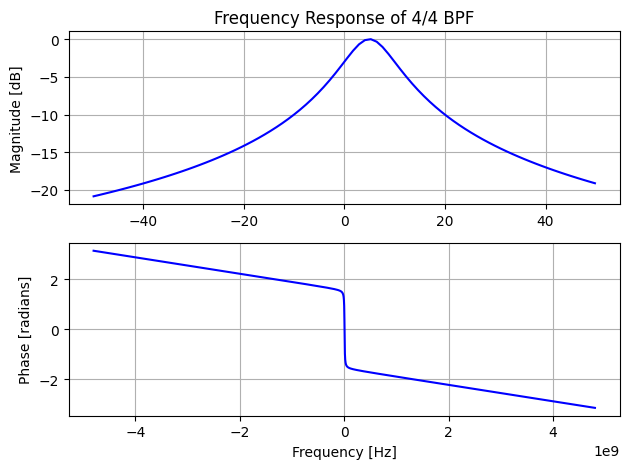

In [11]:
# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask_1 = (frequencies_1 >= freq_range_min) & (frequencies_1 <= freq_range_max)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(frequencies_1[mask_1]/1e6, 20 * np.log10(np.abs(H_44[mask_1])), 'b')
plt.title('Frequency Response of 4/4 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(H_44))
plt.plot(frequencies_1, angles, 'b')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.tight_layout()


4/8 BPF Filter Response

H_48_z, k, alpha = 


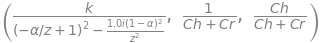

In [12]:
z = sympy.symbols('z')

k, alpha, j, Ch, Cr = sympy.symbols('k, alpha, j, Ch, Cr')
H_48_z = k / (((1 - alpha*z**(-1))**2) - ((((1 - alpha)*z**(-1))**2) * 1j))
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

print('H_48_z, k, alpha = ')
H_48_z, k, alpha

In [13]:
#Variables
Ch = 6.65e-12 
Cr = 500e-15 
fs = 600e6

H_48, omega, Zo, fc = filters.DFTF('BPF48', Ch, Cr, fs)

# Convert normalized frequencies (omega) to Hz
frequencies_2 = omega * fs / (2 * np.pi)


4/8 BPF Ch = 6.65e-12 Cr = 5e-13 Fs = 600000000.0
Zo =  3333.3333333333335
Fc =  4.816587210356899  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.05043918331810598
fs / (2 * np.pi) =  95492965.8551372


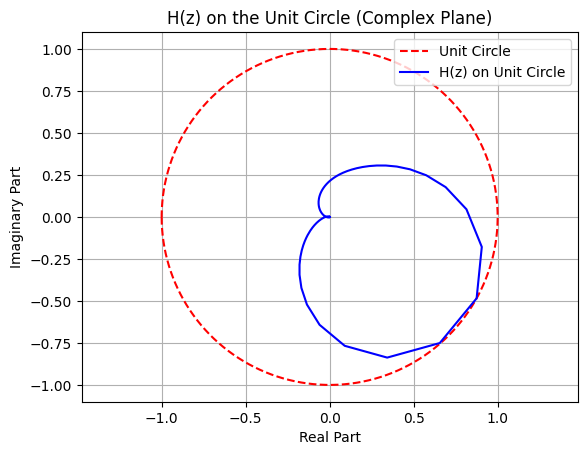

In [14]:
# Unit circle in the complex plane
unit_circle = np.exp(1j * omega)

# Plot the unit circle
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
# Plot H(z) on the complex plane
plt.plot(np.real(H_48), np.imag(H_48), 'b', label='H(z) on Unit Circle')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.show()

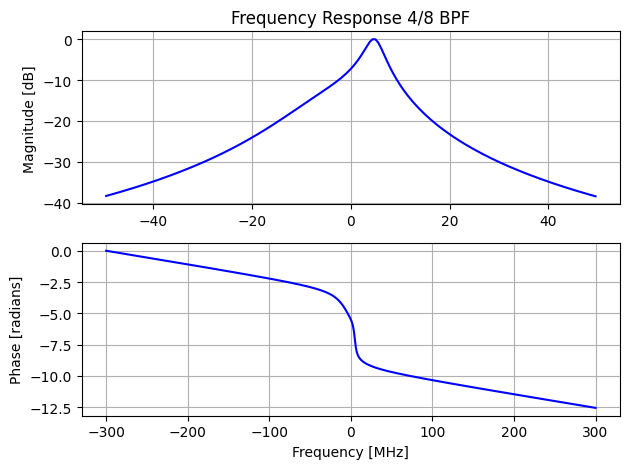

In [15]:
# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask_2 = (frequencies_2 >= freq_range_min) & (frequencies_2 <= freq_range_max)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(frequencies_2[mask_2]/1e6, 20 * np.log10(np.abs(H_48[mask_2])), 'b')
plt.title('Frequency Response 4/8 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(H_48))
plt.plot(frequencies_2/1e6, angles, 'b')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [MHz]')
plt.grid()
plt.tight_layout()

4/8 BPF with cross-connected transconductors

H_48_z, k, alpha = 


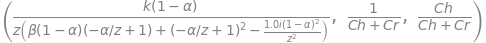

In [16]:
z = sympy.symbols('z')

beta, k, alpha, j, Ch, Cr = sympy.symbols('beta, k, alpha, j, Ch, Cr')
H_48_cc_z = (k * (1 - alpha) * z**-1) / (((1 - alpha*z**(-1))**2) + (((1 - alpha * z**-1) * (1 - alpha))*beta) - (((1 - alpha)**2)) * 1j * z**-2)
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

print('H_48_z, k, alpha = ')
H_48_cc_z, k, alpha

In [17]:
#Variables
Ch = 6.65e-12 
Cr = 500e-15 
beta = -0.4
fs = 600e6

H_48_cc, omega, Zo, fc = filters.DFTF('BPF48CC', Ch, Cr, fs, beta)

# Convert normalized frequencies (omega) to Hz
frequencies_3 = omega * fs / (2 * np.pi)

4/8 BPF CC Ch = 6.65e-12 Cr = 5e-13 Fs = 600000000.0 Beta = -0.4
Zo =  3333.3333333333335
Fc =  4.816587210356899  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.05043918331810598
fs / (2 * np.pi) =  95492965.8551372


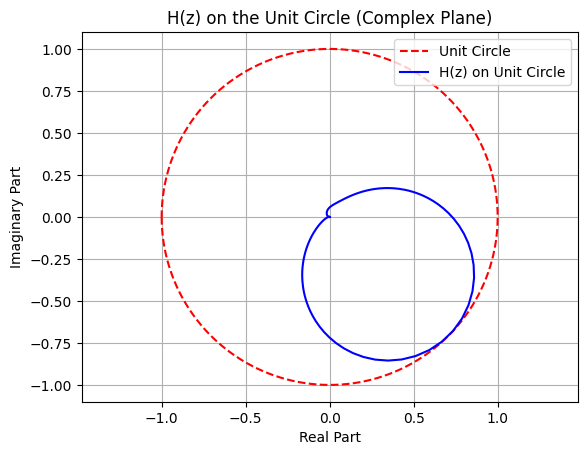

In [18]:
# Unit circle in the complex plane
unit_circle = np.exp(1j * omega)

# Plot the unit circle
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
# Plot H(z) on the complex plane
plt.plot(np.real(H_48_cc), np.imag(H_48_cc), 'b', label='H(z) on Unit Circle')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.show()

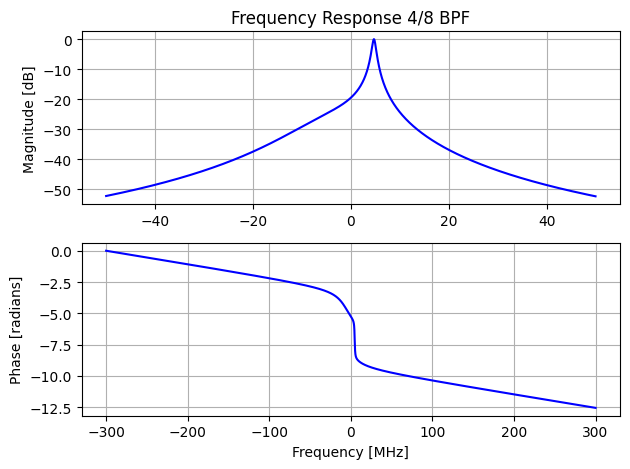

In [19]:
# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask_3 = (frequencies_3 >= freq_range_min) & (frequencies_3 <= freq_range_max)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(frequencies_3[mask_3]/1e6, 20 * np.log10(np.abs(H_48_cc[mask_3])), 'b')
plt.title('Frequency Response 4/8 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(H_48_cc))
plt.plot(frequencies_3/1e6, angles, 'b')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [MHz]')
plt.grid()
plt.tight_layout()

Comparison

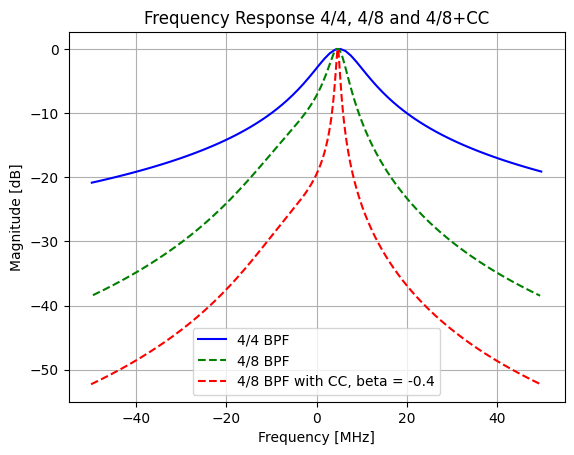

In [20]:
plt.plot(frequencies_1[mask_1]/1e6, 20 * np.log10(np.abs(H_44[mask_1])), 'b', label='4/4 BPF')
plt.ylabel('Magnitude [dB]')
plt.plot(frequencies_2[mask_2]/1e6, 20 * np.log10(np.abs(H_48[mask_2])), 'g--', label='4/8 BPF')
plt.plot(frequencies_3[mask_3]/1e6, 20 * np.log10(np.abs(H_48_cc[mask_3])), 'r--', label='4/8 BPF with CC, beta = -0.4')
plt.grid()
plt.xlabel('Frequency [MHz]')
plt.title('Frequency Response 4/4, 4/8 and 4/8+CC')
plt.legend()

Capacitor Bank Test For 4/4 BPF

4/4 BPF Ch = 8.16e-12 Cr = 1.056e-13 Fs = 9600000000.0
Zo =  986.4267676767677
Fc =  19.77155747366275  MHz
arctan(Cr / Ch) =  0.012940454106101514
fs / (2 * np.pi) =  1527887453.6821952
4/4 BPF Ch = 8.16e-12 Cr = 1.7380000000000003e-13 Fs = 9600000000.0
Zo =  599.3479094744916
Fc =  32.53758522357506  MHz
arctan(Cr / Ch) =  0.021295799729986502
fs / (2 * np.pi) =  1527887453.6821952
4/4 BPF Ch = 8.16e-12 Cr = 2.4200000000000003e-13 Fs = 9600000000.0
Zo =  430.44077134986225
Fc =  45.29907099402303  MHz
arctan(Cr / Ch) =  0.029648172635263596
fs / (2 * np.pi) =  1527887453.6821952
4/4 BPF Ch = 1.343e-11 Cr = 1.056e-13 Fs = 9600000000.0
Zo =  986.4267676767677
Fc =  12.013521228065498  MHz
arctan(Cr / Ch) =  0.007862831257049084
fs / (2 * np.pi) =  1527887453.6821952
4/4 BPF Ch = 1.343e-11 Cr = 1.7380000000000003e-13 Fs = 9600000000.0
Zo =  599.3479094744916
Fc =  19.771557473662753  MHz
arctan(Cr / Ch) =  0.012940454106101517
fs / (2 * np.pi) =  1527887453.6821952
4/4 BPF Ch = 1.343e-1

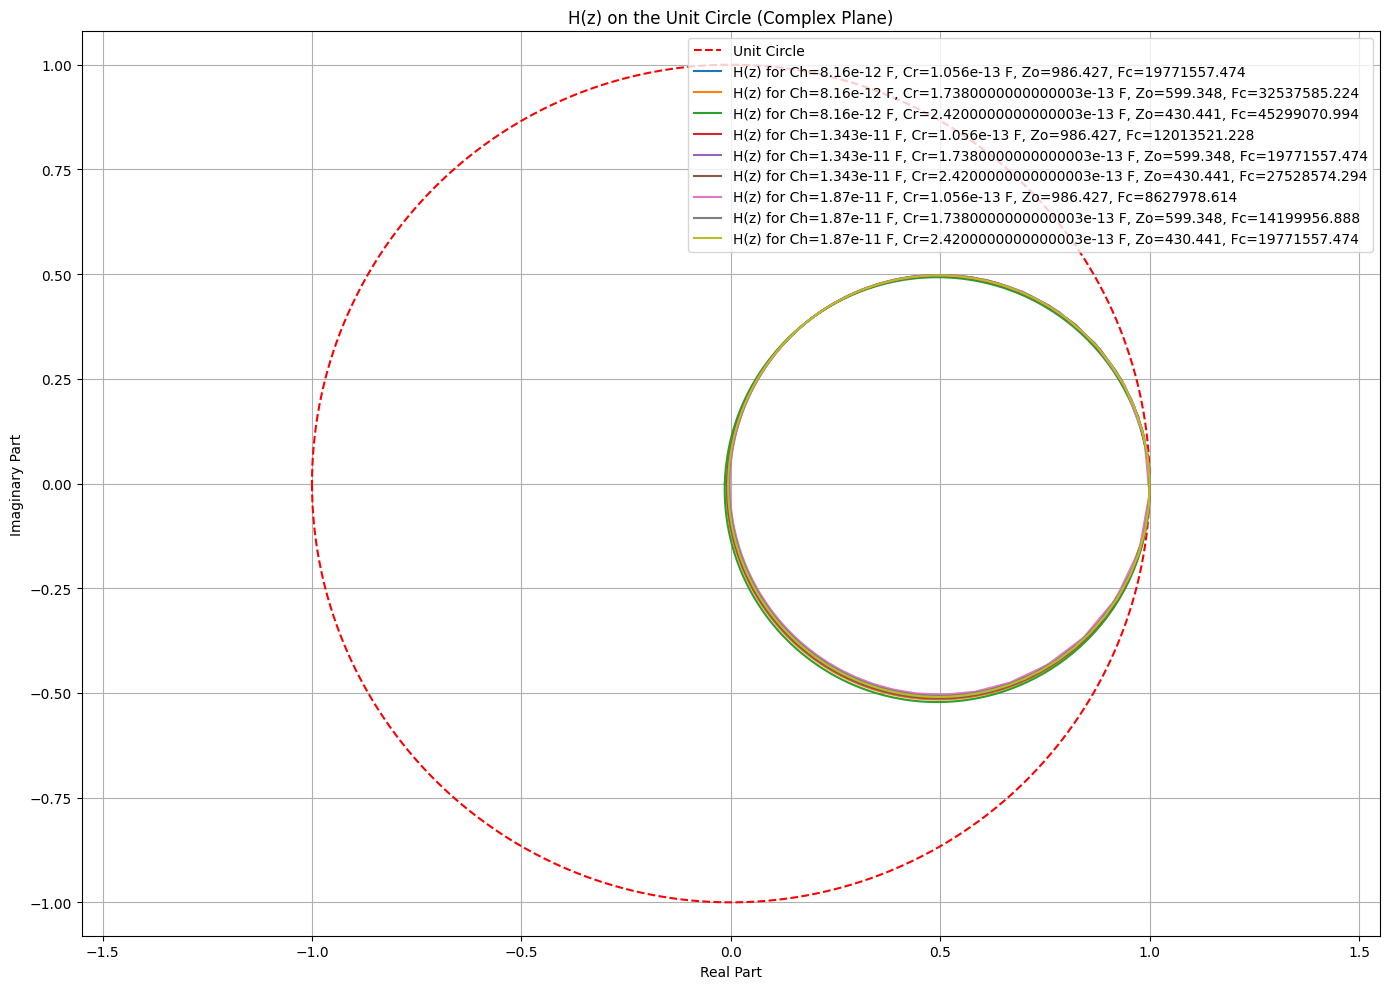

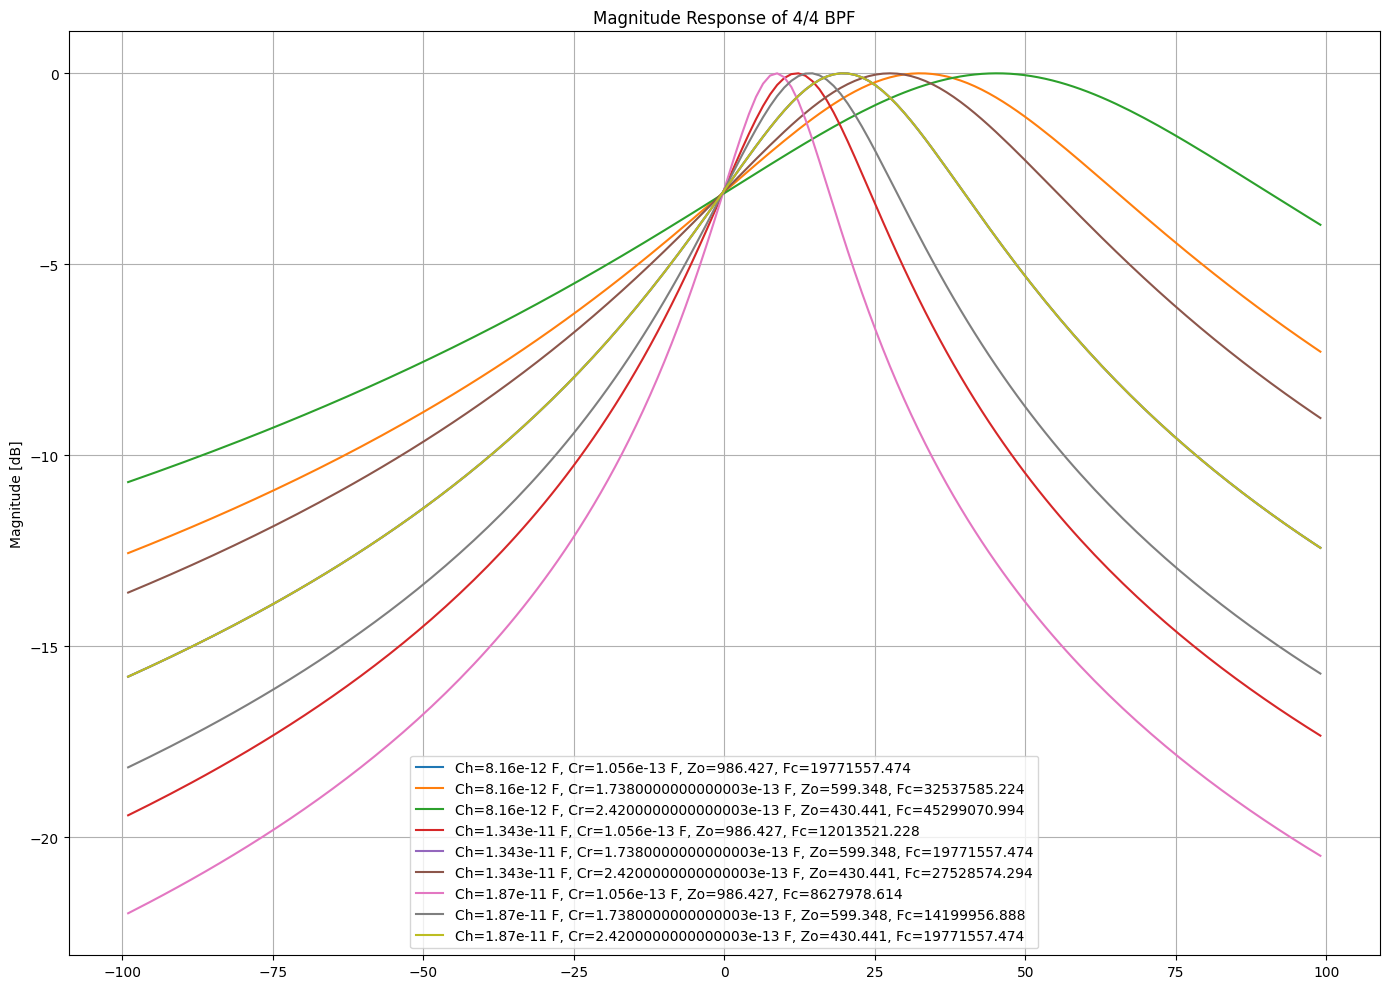

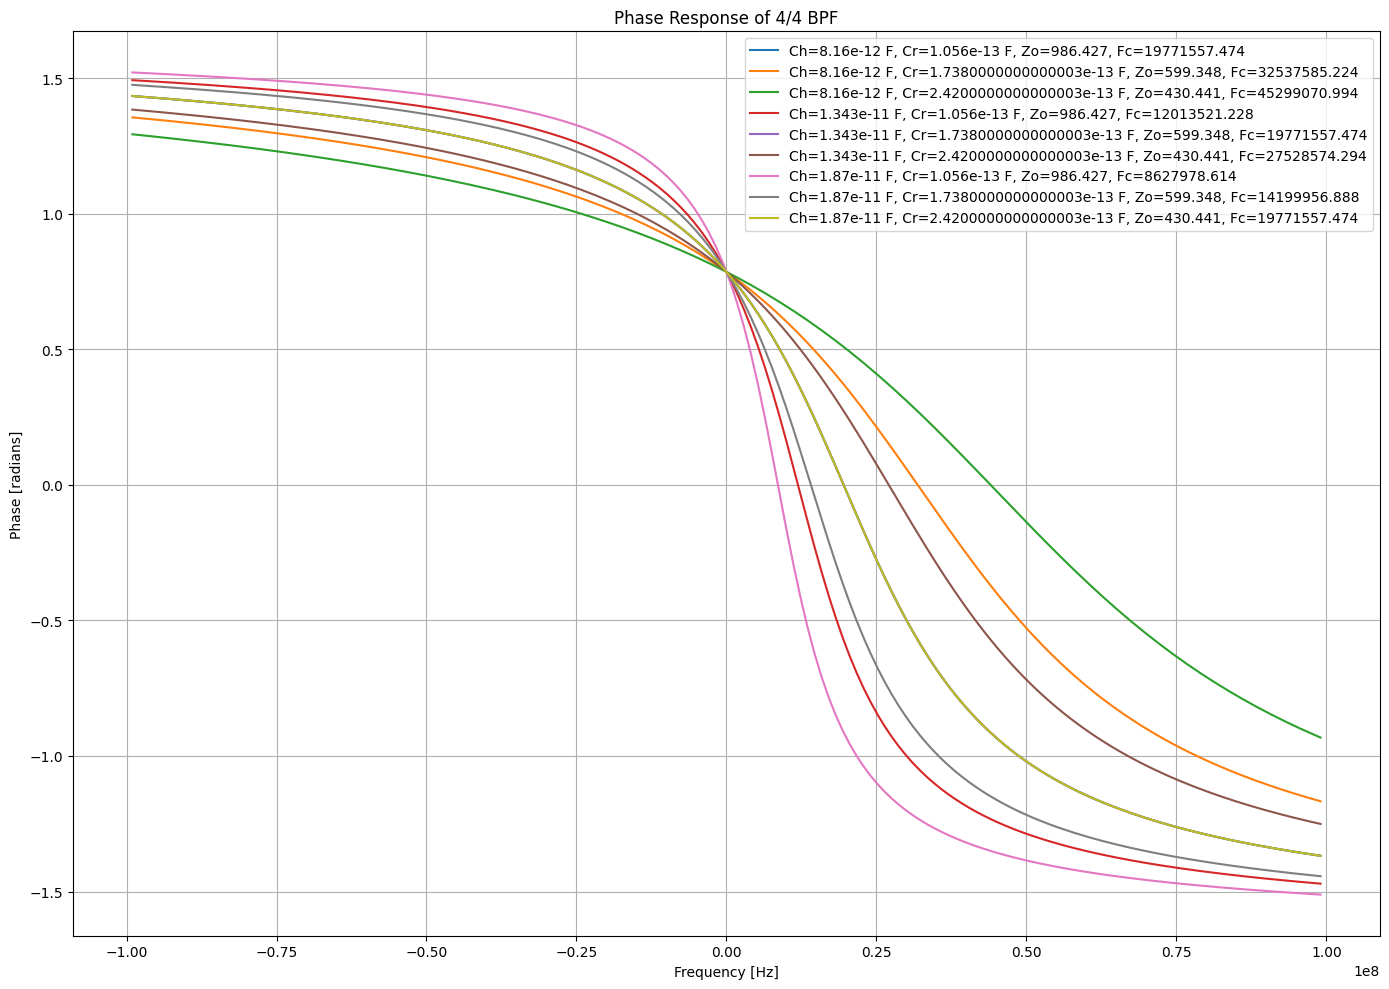

In [21]:
# Variables

Ch = filters.cap_bank(bits=5, unity_cap=340e-15)
Cr = filters.cap_bank(bits=5, unity_cap=4.4e-15)
fs = 9.6e9

# Select the desired capacitance values
Ch = np.linspace(min(Ch), max(Ch), 3)
Cr = np.linspace(min(Cr), max(Cr), 3)

# Initialize 2D arrays for the selected values
H_44 = np.zeros((len(Ch), len(Cr)), dtype=object)
Zo = np.zeros((len(Ch), len(Cr)))
fc = np.zeros((len(Ch), len(Cr)))


for j in range(len(Ch)):
    for i in range(len(Cr)):
        H_44[j][i], omega, Zo[j][i], fc[j][i] = filters.DFTF('BPF44', Ch[j], Cr[i], fs)
        
        # Convert normalized frequencies (omega) to Hz
frequencies = omega * fs / (2 * np.pi)

# Define the frequency range for plotting
freq_range_min = -100e6
freq_range_max = 100e6  

# Apply the frequency range filter
mask = (frequencies >= freq_range_min) & (frequencies <= freq_range_max)

# 1. Unit Circle Plot
plt.figure(figsize=(14, 10))
plt.figure(1)
unit_circle = np.exp(1j * omega)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
for j in range(len(Ch)):
    for i in range(len(Cr)):
        plt.plot(np.real(H_44[j][i]), np.imag(H_44[j][i]), label=f'H(z) for Ch={Ch[j]} F, Cr={Cr[i]} F, Zo={Zo[j][i]}, Fc={fc[j][i]}')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.tight_layout()

# 2. Magnitude Response Plot
plt.figure(figsize=(14, 10))
plt.figure(2)
for j in range(len(Ch)):
    for i in range(len(Cr)):
        plt.plot(frequencies[mask]/1e6, 20 * np.log10(np.abs(H_44[j][i][mask])), label=f'Ch={Ch[j]} F, Cr={Cr[i]} F, Zo={Zo[j][i]}, Fc={fc[j][i]}')
plt.title('Magnitude Response of 4/4 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.legend()
plt.tight_layout()


# 3. Phase Response Plot
plt.figure(figsize=(14, 10))
plt.figure(3)
for j in range(len(Ch)):
    for i in range(len(Cr)):
        angles = np.unwrap(np.angle(H_44[j][i][mask]))
        plt.plot(frequencies[mask], angles, label=f'Ch={Ch[j]} F, Cr={Cr[i]} F, Zo={Zo[j][i]}, Fc={fc[j][i]}')
plt.title('Phase Response of 4/4 BPF')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()



Capacitor Bank Test For 4/8 BPF

4/8 BPF Ch = 1.7448e-12 Cr = 2.616e-13 Fs = 600000000.0
Zo =  6371.0499490316
Fc =  9.12560478583891  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.09556310984918459
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF Ch = 1.7448e-12 Cr = 4.3055e-13 Fs = 600000000.0
Zo =  3871.0176905508456
Fc =  14.083841326239453  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.147485641482794
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF Ch = 1.7448e-12 Cr = 5.995e-13 Fs = 600000000.0
Zo =  2780.094523213789
Fc =  18.4332712635505  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.19303276527732696
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF Ch = 2.8716499999999998e-12 Cr = 2.616e-13 Fs = 600000000.0
Zo =  6371.0499490316
Fc =  5.771943024853166  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.060443646012725186
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF Ch = 2.8716499999999998e-12 Cr = 4.3055e-13 Fs = 600000000.0
Zo =  3

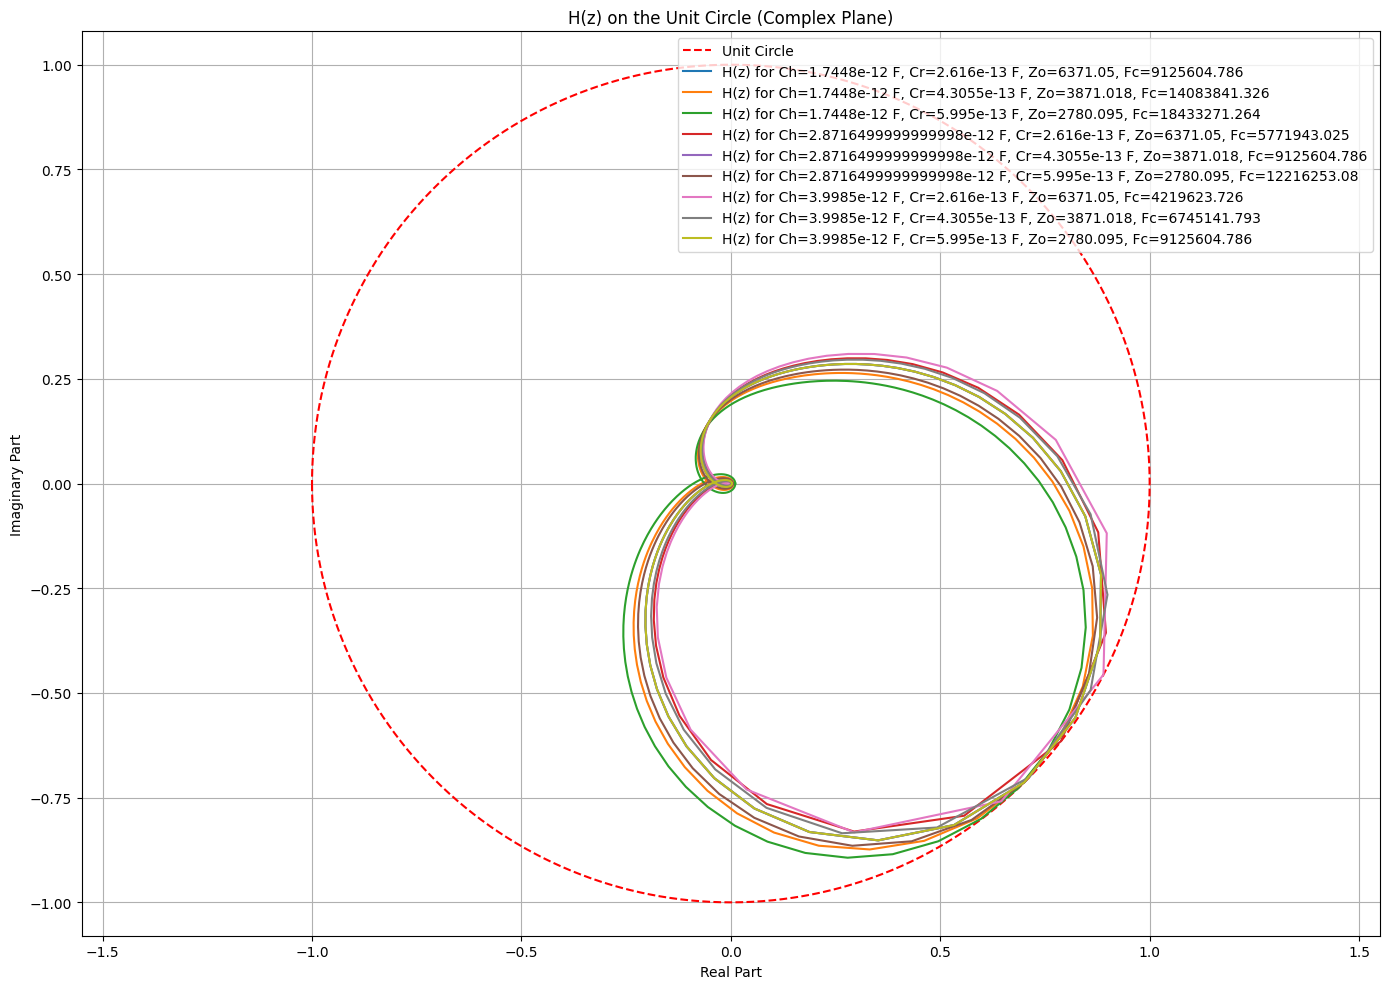

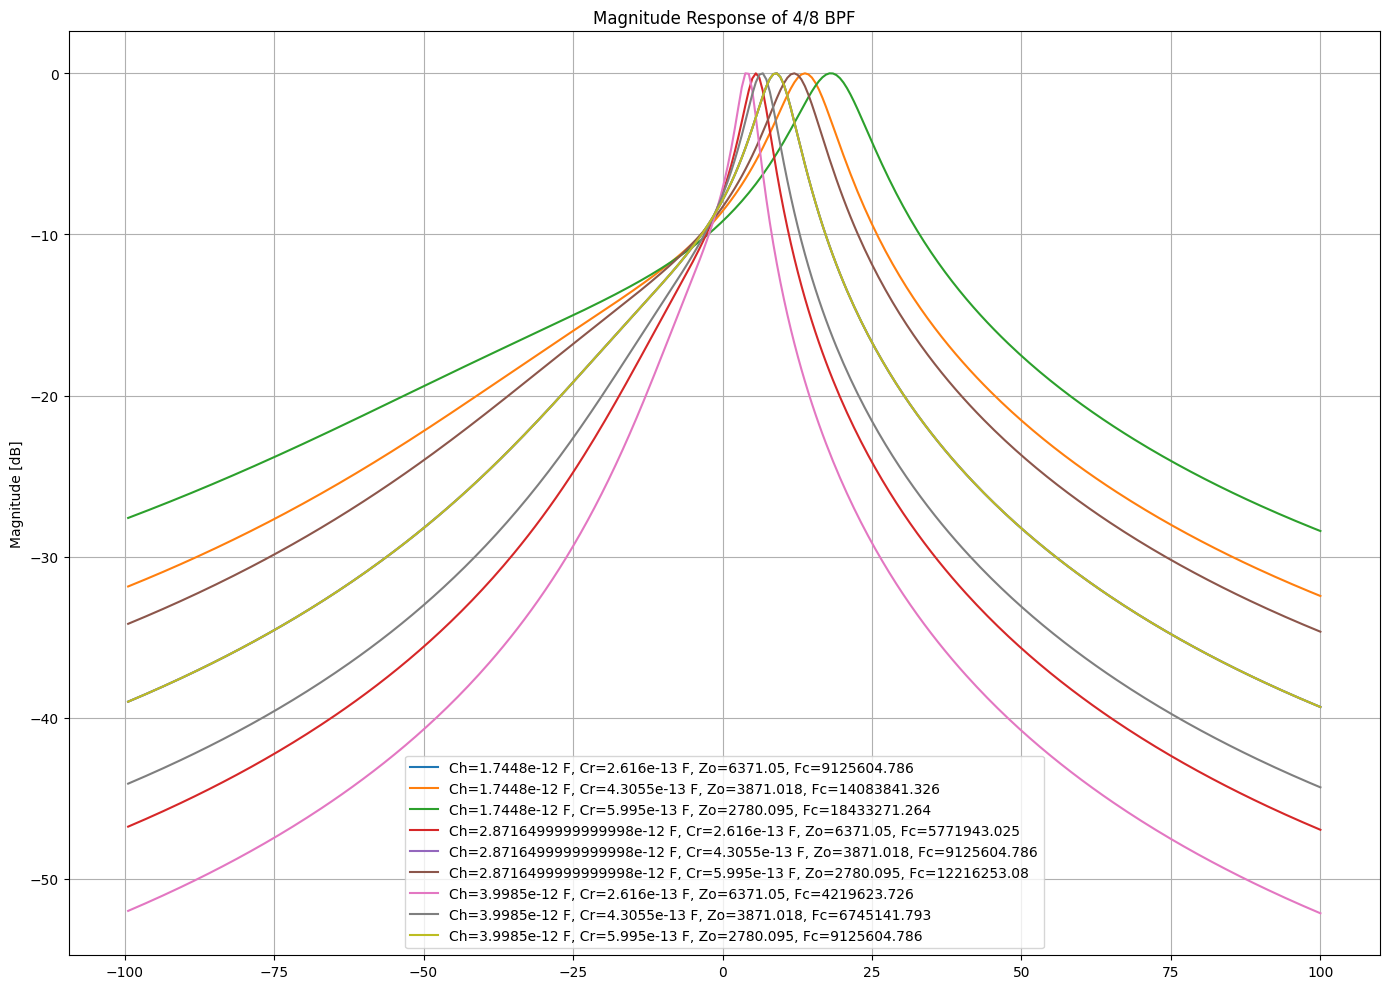

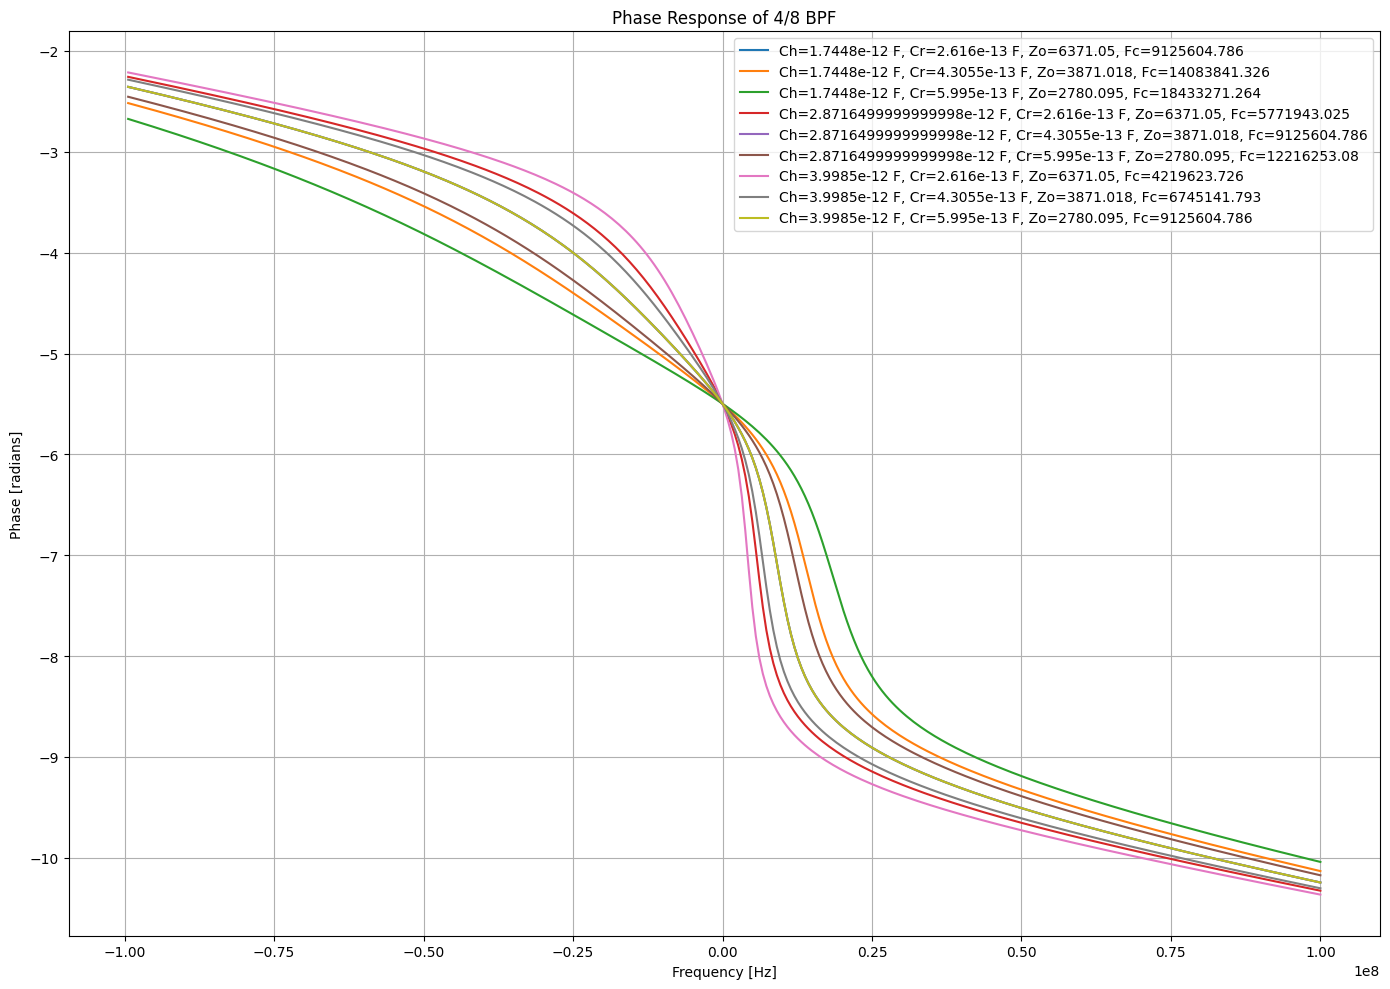

In [22]:
# Variables
Ch = filters.cap_bank(bits=5, unity_cap=72.7e-15)
Cr = filters.cap_bank(bits=5, unity_cap=10.9e-15)
fs = 600e6

# Select the desired capacitance values
Ch = np.linspace(min(Ch), max(Ch), 3)
Cr = np.linspace(min(Cr), max(Cr), 3)

# Initialize 2D arrays for the selected values
H_48 = np.zeros((len(Ch), len(Cr)), dtype=object)
Zo = np.zeros((len(Ch), len(Cr)))
fc = np.zeros((len(Ch), len(Cr)))


for j in range(len(Ch)):
    for i in range(len(Cr)):
        H_48[j][i], omega, Zo[j][i], fc[j][i] = filters.DFTF('BPF48', Ch[j], Cr[i], fs)
        
        # Convert normalized frequencies (omega) to Hz
frequencies = omega * fs / (2 * np.pi)

# Define the frequency range for plotting
freq_range_min = -100e6
freq_range_max = 100e6  

# Apply the frequency range filter
mask = (frequencies >= freq_range_min) & (frequencies <= freq_range_max)

# 1. Unit Circle Plot
plt.figure(figsize=(14, 10))
plt.figure(1)
unit_circle = np.exp(1j * omega)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
for j in range(len(Ch)):
    for i in range(len(Cr)):
        plt.plot(np.real(H_48[j][i]), np.imag(H_48[j][i]), label=f'H(z) for Ch={Ch[j]} F, Cr={Cr[i]} F, Zo={Zo[j][i]}, Fc={fc[j][i]}')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.tight_layout()

# 2. Magnitude Response Plot
plt.figure(figsize=(14, 10))
plt.figure(2)
for j in range(len(Ch)):
    for i in range(len(Cr)):
        plt.plot(frequencies[mask]/1e6, 20 * np.log10(np.abs(H_48[j][i][mask])), label=f'Ch={Ch[j]} F, Cr={Cr[i]} F, Zo={Zo[j][i]}, Fc={fc[j][i]}')
plt.title('Magnitude Response of 4/8 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.legend()
plt.tight_layout()


# 3. Phase Response Plot
plt.figure(figsize=(14, 10))
plt.figure(3)
for j in range(len(Ch)):
    for i in range(len(Cr)):
        angles = np.unwrap(np.angle(H_48[j][i][mask]))
        plt.plot(frequencies[mask], angles, label=f'Ch={Ch[j]} F, Cr={Cr[i]} F, Zo={Zo[j][i]}, Fc={fc[j][i]}')
plt.title('Phase Response of 4/8 BPF')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()



Capacitor Bank Test For 4/8 BPF CC

4/8 BPF CC Ch = 6.542999999999999e-13 Cr = 9.809999999999999e-14 Fs = 600000000.0 Beta = -0.4
Zo =  16989.466530750935
Fc =  9.125604785838902  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.09556310984918451
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF CC Ch = 6.542999999999999e-13 Cr = 1.0355e-13 Fs = 600000000.0 Beta = -0.4
Zo =  16095.284081764043
Fc =  9.578577996983585  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.10030663422386821
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF CC Ch = 6.542999999999999e-13 Cr = 1.0899999999999999e-13 Fs = 600000000.0 Beta = -0.4
Zo =  15290.519877675843
Fc =  10.02635241214123  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4) =  0.10499571693428397
fs / (2 * np.pi) =  95492965.8551372
4/8 BPF CC Ch = 6.906499999999999e-13 Cr = 9.809999999999999e-14 Fs = 600000000.0 Beta = -0.4
Zo =  16989.466530750935
Fc =  8.691612981017201  MHz
arctan((1 - alpha)sin(pi/4)) / alpha + (1 - alpha)cos(pi/4

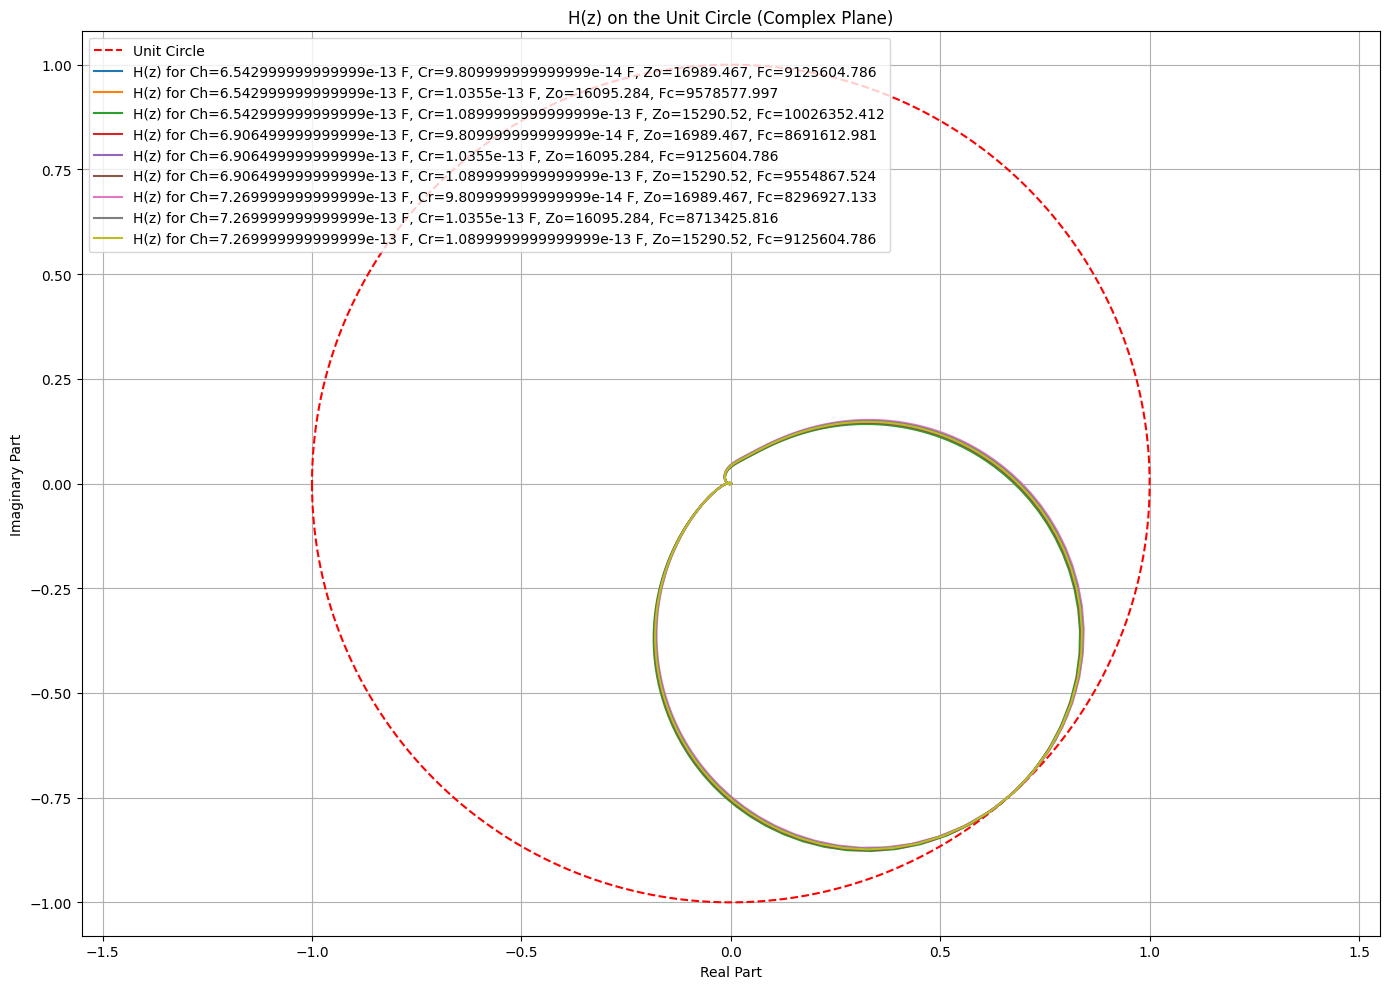

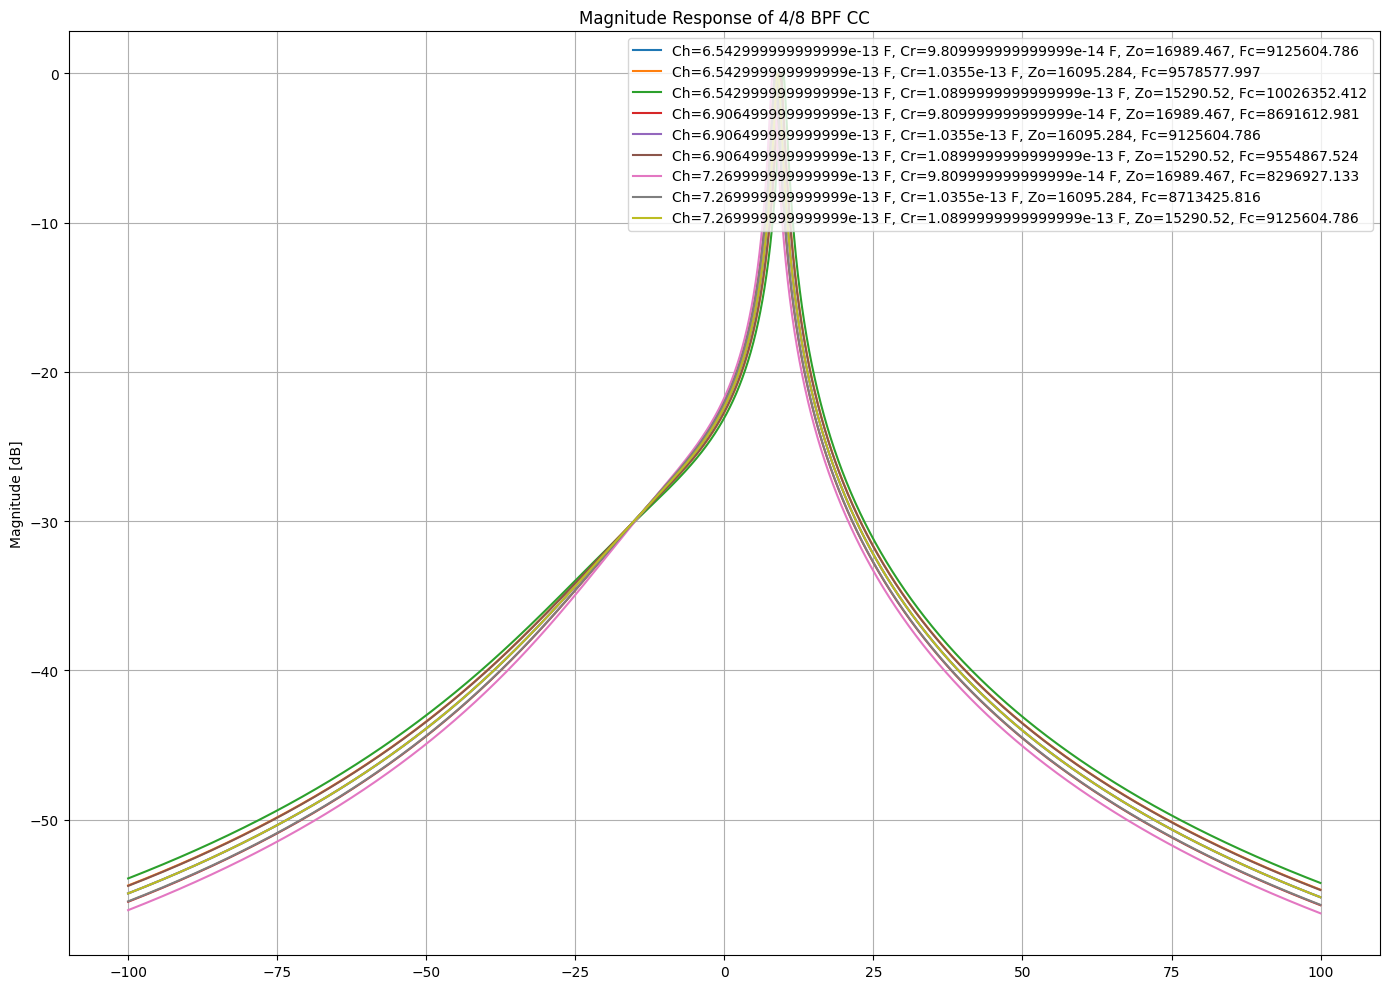

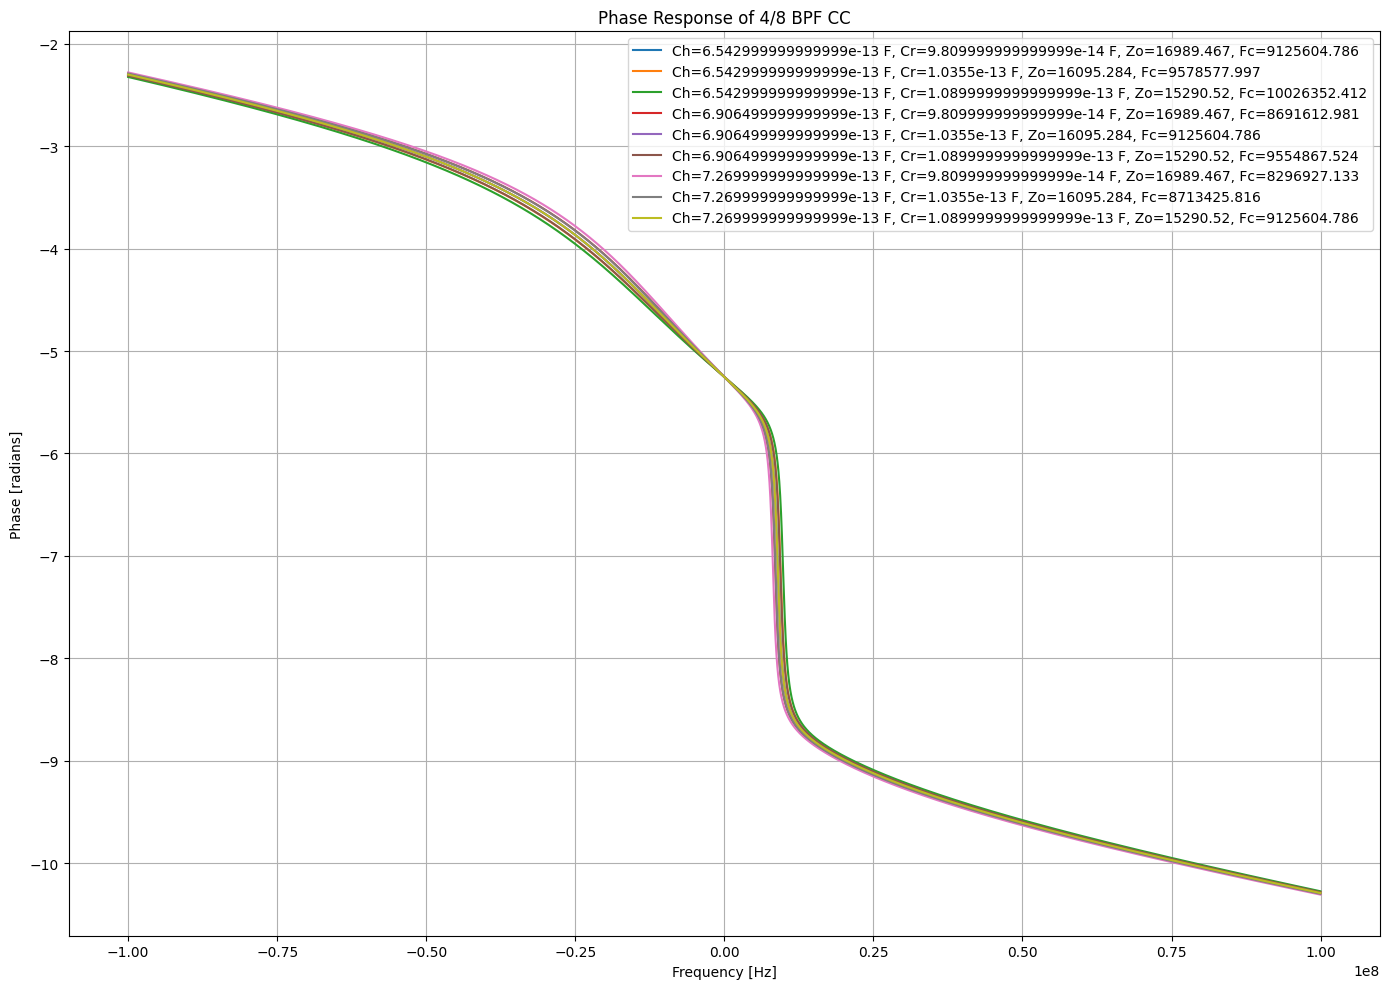

In [23]:
# Variables
Ch = filters.cap_bank(bits=1, unity_cap=72.7e-15)
Cr = filters.cap_bank(bits=1, unity_cap=10.9e-15)
fs = 600e6
beta = -0.4

# Select the desired capacitance values
Ch = np.linspace(min(Ch), max(Ch), 3)
Cr = np.linspace(min(Cr), max(Cr), 3)

# Initialize 2D arrays for the selected values
H_48_cc = np.zeros((len(Ch), len(Cr)), dtype=object)
Zo = np.zeros((len(Ch), len(Cr)))
fc = np.zeros((len(Ch), len(Cr)))


for j in range(len(Ch)):
    for i in range(len(Cr)):
        H_48_cc[j][i], omega, Zo[j][i], fc[j][i] = filters.DFTF('BPF48CC', Ch[j], Cr[i], fs, beta)
        
        # Convert normalized frequencies (omega) to Hz
frequencies = omega * fs / (2 * np.pi)

# Define the frequency range for plotting
freq_range_min = -100e6
freq_range_max = 100e6  

# Apply the frequency range filter
mask = (frequencies >= freq_range_min) & (frequencies <= freq_range_max)

# 1. Unit Circle Plot
plt.figure(figsize=(14, 10))
plt.figure(1)
unit_circle = np.exp(1j * omega)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
for j in range(len(Ch)):
    for i in range(len(Cr)):
        plt.plot(np.real(H_48_cc[j][i]), np.imag(H_48_cc[j][i]), label=f'H(z) for Ch={Ch[j]} F, Cr={Cr[i]} F, Zo={Zo[j][i]}, Fc={fc[j][i]}')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.tight_layout()

# 2. Magnitude Response Plot
plt.figure(figsize=(14, 10))
plt.figure(2)
for j in range(len(Ch)):
    for i in range(len(Cr)):
        plt.plot(frequencies[mask]/1e6, 20 * np.log10(np.abs(H_48_cc[j][i][mask])), label=f'Ch={Ch[j]} F, Cr={Cr[i]} F, Zo={Zo[j][i]}, Fc={fc[j][i]}')
plt.title('Magnitude Response of 4/8 BPF CC')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.legend()
plt.tight_layout()


# 3. Phase Response Plot
plt.figure(figsize=(14, 10))
plt.figure(3)
for j in range(len(Ch)):
    for i in range(len(Cr)):
        angles = np.unwrap(np.angle(H_48_cc[j][i][mask]))
        plt.plot(frequencies[mask], angles, label=f'Ch={Ch[j]} F, Cr={Cr[i]} F, Zo={Zo[j][i]}, Fc={fc[j][i]}')
plt.title('Phase Response of 4/8 BPF CC')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

In [24]:
def cap_bank(bits, unity_cap):
    cap_bank = []
    
    # Base capacitance (24 * unity_capacitance)
    base_cap = (8 + 2**(bits - 1)) * unity_cap

    # Loop through each bit combination from 0 to 2^bits - 1
    for i in range(2**bits):
        cap = base_cap
        for j in range(bits):
            # Calculate the weight for the current bit position
            weight = 2 ** (bits - j - 1)
            if (i & (1 << j)) != 0:
                cap += weight * unity_cap
        cap_bank.append(cap)

    return cap_bank

In [25]:

print(filters.cap_bank(bits=5, unity_cap=72.7e-15))

[1.7448e-12, 2.908e-12, 2.3264e-12, 3.4896e-12, 2.0356e-12, 3.1988e-12, 2.6171999999999998e-12, 3.7804e-12, 1.8902e-12, 3.0534000000000003e-12, 2.4718e-12, 3.635e-12, 2.181e-12, 3.3442000000000002e-12, 2.7626e-12, 3.9258e-12, 1.8175e-12, 2.9807e-12, 2.3990999999999997e-12, 3.5623e-12, 2.1083e-12, 3.2715e-12, 2.6898999999999997e-12, 3.8531e-12, 1.9629e-12, 3.1261e-12, 2.5445e-12, 3.7077000000000004e-12, 2.2537e-12, 3.4169e-12, 2.8353e-12, 3.9985e-12]
